In [1]:
# x cada pacient (epoc chanel median) comarat amb TEIQue-SF

In [2]:
#IMPORTS

import matplotlib
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import scipy.interpolate
import mne
import scipy
import statistics
from pywt import wavedec
from scipy import signal
import matplotlib.colors as mcolors
import random
import seaborn as sns
import os
from scipy import stats
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
from Definicions import upperchanel
from Definicions import group_inf
#from Definicions import mediumchanel
from Definicions import opteciogrups
from Definicions import find_nearest
from Definicions import grabt
from Definicions import epoch_return
from Import_all import Import_Patients #to create a list of the patiens with the EO-EC data and 12 chanels
from BandPower_Epoch_1c import BanPoer_Epoch
from BandPower_Epoch_1c import bandpower
from Extract_info import calcul
from Extract_info import minus_return
from Extract_info import max5_return

In [4]:
with open("EO_EC_Pacients_save.txt", "rb") as fp:   # Unpickling
    EO_EC_Pacients = pickle.load(fp)


with open("sorted_list_ECsave.txt", "rb") as fp:   # Unpickling
    sorted_list_EC = pickle.load(fp)


with open("sorted_list_EO_save.txt", "rb") as fp:   # Unpickling
    sorted_list_EO = pickle.load(fp)


In [5]:
len(sorted_list_EO)

86

In [6]:
import csv

# open the file in universal line ending mode 
with open('Files/TEIQue-SF.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  reader = csv.DictReader(infile)
  data = {}
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
TeiQueSF_emotionality = data['TeiQueSF_emotionality']
TeiQueSF_well_being = data['TeiQueSF_well_being']
colors = ['r','b','g','y','r']
results_emoto_EC = []


In [7]:

#Relative for EO

#x 1 grup <- 

#Subject = EO_EC_Pacients[S] max=15
#EO = EO_EC_Pacients[S][0]
#EC = EO_EC_Pacients[S][1]
#Channel = EO_EC_Pacients[0][1][Num] max=12
pacient_beta_EO = []

pacient_alpha_EO = []

pacient_gama_EO = []

pacient_theta_EO = []

pacient_delta_EO = []

for pacient in EO_EC_Pacients:
    EO_Epochs = epoch_return(pacient[0])
    chanels_betta = []
    chanels_gama = []
    chanels_alpha = []
    chanels_theta = []
    chanels_delta = []
    for chane in EO_Epochs:
        for epoch in chane:
            f_beta = bandpower(epoch, 250,[30, 250], window_sec=1, relative=True)
            chanels_betta.append(f_beta)
            #gamma
            f_gama = bandpower(epoch, 250, [32, 100], window_sec=1, relative=True)
            chanels_gama.append(f_gama)
            #alpha
            f_alpha = bandpower(epoch, 250, [9, 13], window_sec=1, relative=True)
            chanels_alpha.append(f_alpha)
            #theta
            f_theta = bandpower(epoch, 250, [4, 8], window_sec=1, relative=True)
            chanels_theta.append(f_theta)
            #delta
            f_delta = bandpower(epoch, 250, [0.1, 4], window_sec=1, relative=True)
            chanels_delta.append(f_delta)
            
    #for chanels

    mean_x = statistics.median(chanels_betta)
    pacient_beta_EO.append(mean_x)

    mean_x = statistics.median(chanels_gama)
    pacient_alpha_EO.append(mean_x)

    mean_x = statistics.median(chanels_alpha)
    pacient_gama_EO.append(mean_x)

    mean_x = statistics.median(chanels_theta)
    pacient_theta_EO.append(mean_x)

    mean_x = statistics.median(chanels_delta)
    pacient_delta_EO.append(mean_x)



In [8]:
pacient_beta_EC = []

pacient_alpha_EC = []

pacient_gama_EC = []

pacient_theta_EC = []

pacient_delta_EC = []

for pacient in EO_EC_Pacients:
    chanels_betta = []
    chanels_gama = []
    chanels_alpha = []
    chanels_theta = []
    chanels_delta = []
    EC_Epochs = epoch_return(pacient[1])
    for chane in EC_Epochs:
        for epoch in chane:
            f_beta = bandpower(epoch, 250, [13, 32], window_sec=1, relative=True)
            chanels_betta.append(f_beta)
            #gamma
            f_gama = bandpower(epoch, 250, [32, 100], window_sec=1, relative=True)
            chanels_gama.append(f_gama)
            #alpha
            f_alpha = bandpower(epoch, 250, [9, 13], window_sec=1, relative=True)
            chanels_alpha.append(f_alpha)
            #theta
            f_theta = bandpower(epoch, 250, [4, 8], window_sec=1, relative=True)
            chanels_theta.append(f_theta)
            #delta
            f_delta = bandpower(epoch, 250, [0.1, 4], window_sec=1, relative=True)
            chanels_delta.append(f_delta)


    mean_x = statistics.median(chanels_betta)
    pacient_beta_EC.append(mean_x)

    mean_x = statistics.median(chanels_gama)
    pacient_alpha_EC.append(mean_x)

    mean_x = statistics.median(chanels_alpha)
    pacient_gama_EC.append(mean_x)

    mean_x = statistics.median(chanels_theta)
    pacient_theta_EC.append(mean_x)

    mean_x = statistics.median(chanels_delta)
    pacient_delta_EC.append(mean_x)

EC - EMotional

(-0.135991666029336, 0.21185171329412195)
(-0.10545324774473815, 0.33388369593927536)
(-0.004935526599057239, 0.9640270441207348)
(0.09586070221771192, 0.37994835415397765)
(0.10299946997035955, 0.3453159867304988)


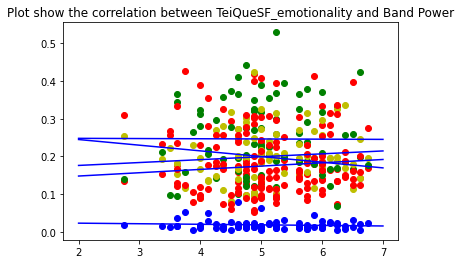

In [9]:
liss =[pacient_beta_EC, pacient_alpha_EC, pacient_gama_EC, pacient_theta_EC, pacient_delta_EC]
colors = ['r','b','g','y','r']
results_emoto_EC = []

for e in range(0,5): 
    eo_betta_pi = calcul(names, sorted_list_EO, TeiQueSF_emotionality, liss[e], 2, 7, colors[e])
    results_emoto_EC.append(eo_betta_pi)


In [10]:
y = minus_return(names, sorted_list_EO, TeiQueSF_emotionality, liss)
print(y)


[-0.024656063019359103, -0.014473801059229158, 0.038712138953469574, 0.03855265358869982, 0.00851205517375989]


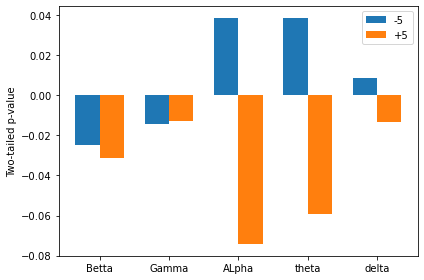

In [11]:
from Extract_info import plotbar_info
plotbar_info_(names, sorted_list_EO, TeiQueSF_emotionality, liss)
# band power - srtmean

EO - emotional

(-0.1165075695298069, 0.28539440505806696)


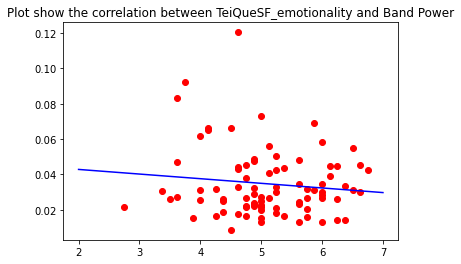

(-0.11226651201092579, 0.303413942938324)


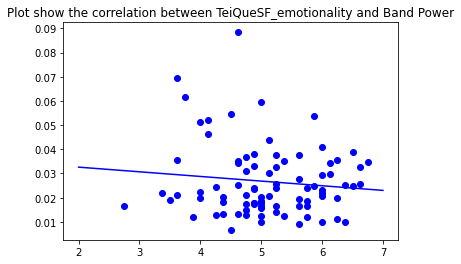

(0.010889233140484858, 0.9207350606214175)


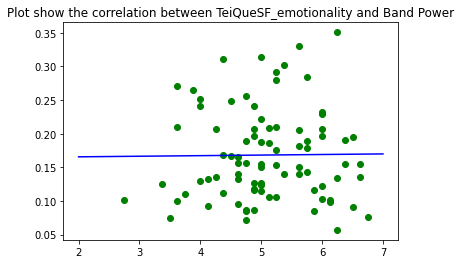

(0.06361654818752879, 0.5606255016243434)


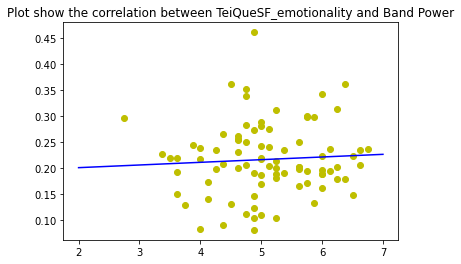

(0.17552411228331202, 0.10598596242973965)


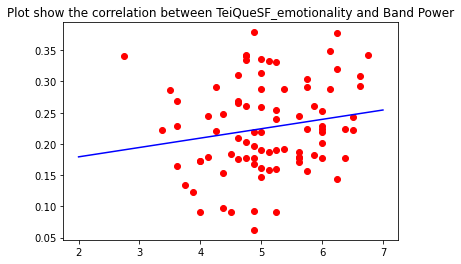

In [11]:
liss =[pacient_beta_EO, pacient_alpha_EO, pacient_gama_EO, pacient_theta_EO, pacient_delta_EO]
colors = ['r','b','g','y','r']
results_emoto_EO = []
for e in range(0,5): 
    eo_betta_pi = calcul(names, sorted_list_EO, TeiQueSF_emotionality, liss[e], 2, 7, colors[e])
    plt.show()
    results_emoto_EO.append(eo_betta_pi)

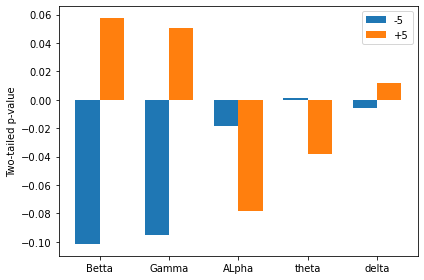

In [12]:
plotbar_info(names, sorted_list_EO, TeiQueSF_emotionality, liss)

EC -well 

(-0.03569681329324292, 0.7441984867314014)
(0.06922400579980545, 0.5265223174537107)
(-0.1429722978996863, 0.18910650740136903)
(0.1660926736873009, 0.12641865674027394)
(0.0632330464105408, 0.5629956819347136)


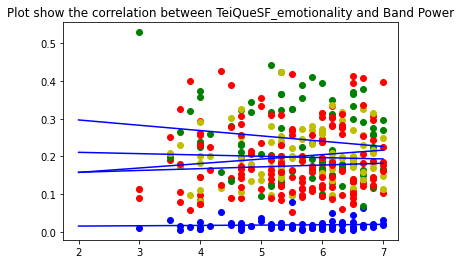

In [13]:
liss =[pacient_beta_EC, pacient_alpha_EC, pacient_gama_EC, pacient_theta_EC, pacient_delta_EC]
colors = ['r','b','g','y','r']
results_well_EC = []

for e in range(0,5): 
    eo_betta_pi = calcul(names, sorted_list_EO, TeiQueSF_well_being, liss[e], 2, 7, colors[e])
    results_well_EC.append(eo_betta_pi)

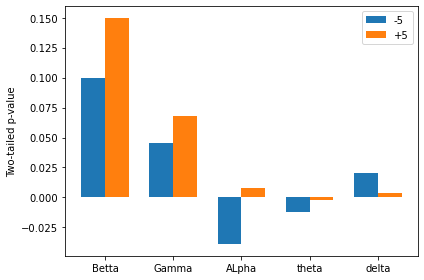

In [14]:
plotbar_info(names, sorted_list_EO, TeiQueSF_well_being, liss)

EO - well

(0.02481030673253884, 0.8206185979902932)


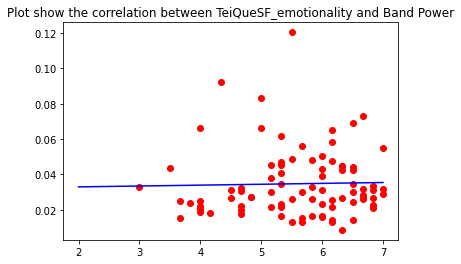

(0.03634011053854669, 0.7397513243351824)


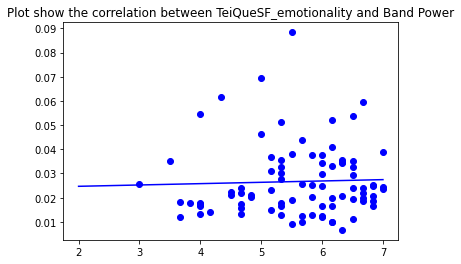

(-0.10867786359471482, 0.31922911022269684)


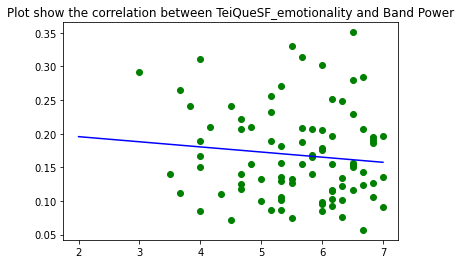

(0.15352135312417975, 0.15817187836178223)


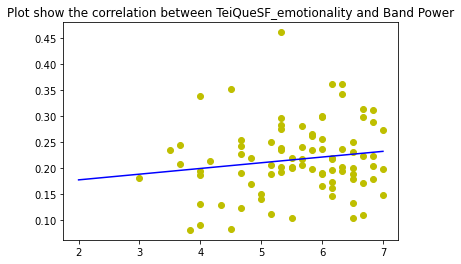

(0.04177115557604576, 0.7025591966662899)


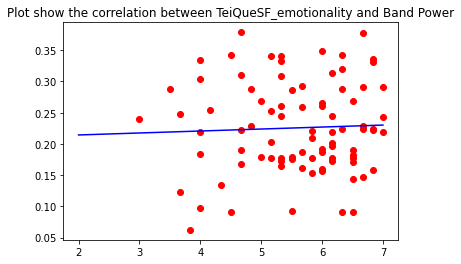

In [15]:
liss =[pacient_beta_EO, pacient_alpha_EO, pacient_gama_EO, pacient_theta_EO, pacient_delta_EO]
colors = ['r','b','g','y','r']
results_well_EO = []

for e in range(0,5): 
    eo_betta_pi = calcul(names, sorted_list_EO, TeiQueSF_well_being, liss[e], 2, 7, colors[e])
    results_well_EO.append(eo_betta_pi)

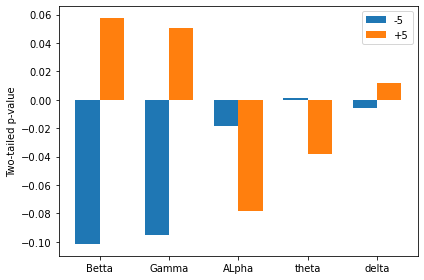

In [16]:
plotbar_info(names, sorted_list_EO, TeiQueSF_emotionality, liss)

In [13]:
'''
comprova = [results_emoto_EC, results_emoto_EO, results_well_EC, results_emoto_EO]
nums = [0.7, 0.09]
for e in comprova:  
    for i in range(0,len(results_emoto_EC)):
        primer_val = e[i][0]
        d = nums[0]
        if primer_val>=0.7:
            print(e[i])
            if float(segon_val)<=float(d):
                print(e[i])     '''  
    

In [14]:
#for freq - all bands -all plots- (create table values).
#       emotional.                     x
#.  alfa gama betta...          alfa gama betta... 
#eo. 
#ec 

In [ ]:
#In our case the two blues would be the two groups of high low values, and the cond_A and cond_B etc would be the bands.
#bardplot